In [1]:
import warnings

warnings.filterwarnings("ignore")
import os

if "jbook" in os.getcwd():
    os.chdir(os.path.abspath(os.path.join("../..")))
FORCE = True

# AppVoCAI Data Quality Analysis Stage
---

Data quality analysis is a critical step in any NLP application, ensuring that the dataset meets both task-specific quality standards and model optimization requirements. It helps leverage the strengths of the model while mitigating potential weaknesses inherent in raw data. The **Data Quality Analysis Stage** will follow a comprehensive and model-informed approach, consisting of the following key components:

1. **Data Quality Approach**: We begin by outlining our overall **Data Quality Approach** for the ABSA (Aspect-Based Sentiment Analysis) task. This approach leverages the advanced properties of *transformer* models, which excel in understanding contextual and semantic relevance. Our methodology may depart from traditional data quality and cleaning processes by integrating model-driven assessments and task-specific criteria. Instead of focusing solely on syntactic correctness or completeness, our approach emphasizes data that enhances semantic understanding and model interpretability, thereby optimizing performance for ABSA tasks.

2. **Data Quality Anomaly Detection**: With a clear understanding of our approach, we proceed to the **Data Quality Anomaly Detection** step. This phase is designed to identify and flag anomalies that could compromise the validity, relevance, or integrity of the dataset. Key anomalies include:
   - Non-English text in reviews or app data, which may require separate handling or filtering depending on the model's language capabilities.
   - Excessive special characters, which could introduce noise into the model or interfere with text preprocessing.
   - The presence of Personally Identifiable Information (PII) such as email addresses, URLs, and phone numbers, which must be flagged to ensure user privacy.
   - Missing or invalid data values, which can distort analyses or lead to incorrect conclusions.

3. **Data Quality Analysis**: After anomalies are detected and flagged, we move to the **Data Quality Analysis** stage. This step provides both quantitative and qualitative evaluations of dataset quality, focusing on several key dimensions:
   - **Validity**: Ensures that the data adheres to predefined rules and constraints, such as correct data types and value ranges.
   - **Relevance**: Assesses the pertinence of the data to the ABSA task, ensuring that the dataset contains meaningful features for sentiment analysis.
   - **Uniqueness**: Evaluates the degree of duplication in the dataset, identifying redundant records that may skew analysis.
   - **Completeness**: Measures the extent to which the dataset is free from missing or incomplete values.
   - **Privacy**: Assesses the dataset for potential privacy issues, ensuring that sensitive information is properly handled or anonymized.

4. **Data Cleaning Strategy**: Finally, based on the findings from the anomaly detection and analysis stages, we outline targeted **Data Cleaning Remediation** steps. These steps will address flagged anomalies and any identified data quality issues, ensuring that the dataset is suitable for downstream tasks and model training. This phase will also identify areas for further improvement, with a focus on enhancing data quality while preserving the strengths of transformer models.

By the end of this section, we will have a comprehensive data cleaning strategy that effectively leverages the strengths of transformer models. This strategy will ensure the data is of high quality, task-optimized, and ready for accurate and efficient model training.

## Data Quality Approach for Aspect-Based Sentiment Analysis using Transformer Models
---

Data quality assessment and analysis are standard operating procedures in NLP, and for good reason: machine learning models often struggle with performance-degrading inconsistencies and irrelevant artifacts in text data. Whereas, these *traditional* models, highly sensitive to noise, require careful preprocessing to function effectively; *transformer* models such as **GPT-2** {cite}`BetterLanguageModels`, **BERT** {cite}`devlinBERTPretrainingDeep2019a`, and its descendants, **RoBERTA** {cite}`liuRoBERTaRobustlyOptimized2019`, and **DeBERTa** {cite}`heDeBERTaDecodingenhancedBERT2021`, exhibit greater stability and robustness due in part to fine-tuning on **user-generated content** (UGC) datasets and certain architectural differences: **subword tokenization**, **contextual embeddings**, and **self-attention mechanisms**.

**Subword Tokenization**   
Experiments have demonstrated that subword tokenization methods such as Byte-Pair Encoding {cite}`Gage1994ANA`, WordPiece, and SentencePiece {cite}`kudoSentencePieceSimpleLanguage2018` significantly improve transformer model performance in natural language processing tasks such as machine translation and sentence classification. By breaking down words into frequently-occurring subword units, models can more effectively deal with rare and out-of-vocabulary words, leading to better overall accuracy and performance. 

**Contextual Embeddings**    
Given a corpus, static tokenizers such as Word2Vec {cite}`mikolovEfficientEstimationWord2013` are idempotent, fixed, and context-independent. That is, in the sentence "From atop the *bank*, we saw the waves roll in.", the word `bank` will always be assigned the same unique vector, regardless of the context in which it appears. Contextual embeddings, by contrast, are dynamic and context-dependent, allowing models to *embed* the semantic meaning of a word within a sequence.

**Self-Attention**   
Central to transformer-based models' ability to capture context is the **self-attention** mechanism {cite}`chengLongShortTermMemoryNetworks2016`; whereby, each token in a sequence is represented by three vectors:  
- **Key** ($𝑘$k): Encodes what each token offers in terms of information and context.
- **Query** ($𝑞$): Encodes what each token is seeking from others in the sequence.
- **Value** ($𝑣$v): Contains the actual information each token contributes.    

The dot product of the query and key vectors calculates a relevance score, quantifying how much each token should attend to others. These scores are used to weight the value vectors, allowing the model to dynamically aggregate contextual information across the sequence. For example, in the sentence "The cat sat on the mat", the query for "sat" may attend more to "cat" (subject) and "mat" (location) based on their relevance.

**Fine-Tuning on UGC Datasets**   
Finally, fine-tuning on UGC datasets such as the **IMDB Movie Reviews Dataset** {cite}`maas-EtAl:2011:ACL-HLT2011`, **Laptop Reviews**, and **Restaurant Reviews** {cite}`pontiki-etal-2014-semeval`, exposes models to informal and noisy text, aligning them more closely with the characteristics of real-world language.

In all, these facets interact to make transformer models not only robust to real-world noise, grammatical errors, informal word forms, and misspellings, but also allow them to derive semantic meaning from slang, emojis, emoticons, abbreviations, and internet jargon. While traditional preprocessing aims to eliminate such noise, overprocessing this 'useful noise' - grammatical errors, informal expressions, and idiosyncratic features - can hinder, rather than enhance, model performance and generalization {cite}`languageandmultimodalailamalabimperialcollegelondonukBetterUnderstandingNoise2021`. By preserving or even embracing this *useful* noise, we leverage transformer model architectural strengths, enabling them to become more adaptable and generalizable in practical applications.

Next, we describe and construct the Data Quality Anomaly Detection stage.

## Data Quality Anomaly Detection
---

Here, we detect data quality anomalies in the dataset along four + 1 dimensions of data quality: **validity**, **completeness**, **relevance**, **uniqueness**, and **privacy and compliance**. 

### Validity Dimension
Valid data adhere to expected formats, structures, encoding, patterns, values, and ranges.

1. **Values**: 
    - **Rating**: Ensure that `rating` values are discrete values in [1,5]
    - **Category**: All `category` values must be one of the 14 categories evaluated in this study.
    - **Review Date**: Review `date` values must be between January 1, 2020, and September 30, 2023.

2. **Structure**: Evaluate the degree to which the data are represented with appropriate data types, and are free of corrupting noise that carries no inherent meaning for modeling. Noise flagged during the data quality anomaly detection stage are:
    - **Excessive Special Characters**: The presence of excessive or random special characters can corrupt the intended meaning of the text and make it harder for models to interpret context. Accuracy checks ensure that these characters are only present when they add legitimate semantic value, such as in programming-related text or stylized writing.  
    - **Control Characters**: Control characters, which are non-printable characters like tabs or line breaks embedded in text data, can disrupt text parsing and processing. Ensuring their absence or appropriate use maintains the structural accuracy needed for smooth NLP operations. 
    - **HTML Characters**: Text data sourced from the web may contain HTML tags or character entities that interfere with the text's readability and model understanding. Accuracy checks to sanitize or transform these elements to their intended textual form.  
    - **Excessive Whitespace**: Extra spaces or line breaks, though seemingly minor, can affect text tokenization and representation in models. Normalizing whitespace ensures text is processed in a consistent, meaningful way.  
    - **Accented and Diacritic Characters**: While accented characters are valid in many languages, their unintended presence in primarily non-accented text can indicate data entry errors. Checks for these characters verify if they are linguistically appropriate or require correction. 

3. **Patterns**: Pattern analysis can expose signals of SPAM, non-sensical sequences of text, and excessive repetition. Data quality anomalies of interest include:
    - **Repeated Sequences**: Reviews with excessive repetition of sequences, such as repeated letters, words, or patterns, can indicate spam or low-quality content. Validity checks identify such sequences, enabling corrective measures to ensure high-quality input for NLP models. 
    - **Repeated Words**: Similar to repeated sequences, the presence of redundant words may indicate automated or spam-like content. Detecting and addressing these issues helps maintain the linguistic integrity of the dataset.  
    - **Repeated Phrases**: Repeated phrases can dilute the semantic richness of the text and may signify low-quality or irrelevant content. Validity checks ensure these phrases are flagged for removal or further examination. 
    - **Elongation**: Text elongation, like in "sooo coool," is often used to emphasize words but may not be handled uniformly by models. Accuracy checks flag or normalize elongation to ensure consistent semantic interpretation. 

By incorporating these **validity** checks, we isolate observations requiring further scrutiny and treatment during the data cleaning stage.

### Completeness Dimension
> Every valid logical expression is provable. Equivalently, every logical expression is either satisfiable or refutable.  (Gödel 1929). 

Here we refer to the Completeness *Dimension*, not to be confused with Gödel’s Completeness *Theorem* above! (*This is what happens we you make computer scientists take philosophy classes*). Primarily, our focus is NULL values in the dataset. A secondary examination is the degree to which the data are complete in terms of representation along two dimensions: **categories** and **sentiments**. Completeness mitigates against model bias and prediction errors derived from class imbalance and under/over-representation.

### Relevance Dimension
The **Relevance** dimension in text data quality ensures that the content is contextually appropriate and meaningful for the specific NLP task or analysis at hand. In other words, the text must be pertinent to the domain, language, or focus of the project. Relevance checks filter out content that could mislead models or degrade the performance of algorithms by introducing off-topic or linguistically inconsistent information.
1. **Non-English App Names**: In datasets where the primary focus is on English-language content, non-English app names can be a source of confusion or skew analysis results. Relevance checks flag these instances, allowing us to either exclude or process them separately to maintain linguistic consistency. 
2. **Non-English Review Text**: Similar to non-English app names, reviews written in languages other than English may be irrelevant to models trained specifically on English text. Relevance checks identify non-English text, helping ensure the data aligns with the model's language capabilities and task requirements. 
3. **Review Length < 3**: Very short reviews, typically less than three words, often lack substantive information or context. These reviews are unlikely to provide meaningful insights and may act as noise, affecting sentiment analysis or topic modeling performance. Relevance checks filter these short reviews to maintain a focus on text that contributes valuable content to the analysis.

By assessing relevancy, we ensure that the text data are appropriate, meaningful, and aligned with the goals of the analysis. This dimension helps avoid the inclusion of extraneous or off-topic content that could distort model training or analysis results.

### Uniqueness Dimension
The **Uniqueness** dimension examines the degree to which duplication is extant. Duplicated content can skew analysis, reduce the diversity of linguistic features, and lead to misleading insights. Therefore, **uniqueness** crucially influences the integrity and reliability of analytical results and model inference. Here, we evaluate the uniqueness of:
1. **Records**: Duplicate records are flagged for analysis and removal during the data cleaning stage.
2. **Review Id**: Duplicate review identifiers can indicate duplication or corruption of the qualitative and quantitative review content. Uniqueness checks detect and flag duplicate review IDs by date, keeping the most recent record is the source of truth. 
3. **Review**: Duplicate reviews are extant when multiple instances exist for the [`app_id`, `author`, `content`] combination.

By enforcing the **Uniqueness** dimension, we ensure that analyses are based on a diverse and representative sample of the text.

### Data Governance: Privacy and Compliance
1. **URLs**: Reviews containing URLs may not provide meaningful textual content for analysis and can disrupt language models. Validity checks identify and flag URLs, allowing for their removal or replacement to maintain textual coherence. 
2. **Phone Numbers**: Similar to URLs, phone numbers are often irrelevant to the semantic content of a review and may interfere with text processing. Validity checks detect phone numbers, ensuring that they are either masked or removed to avoid skewing the analysis. 
3. **Email Addresses**: Email addresses can introduce noise and potentially violate privacy policies. Detecting and handling these elements helps maintain data integrity and privacy while ensuring the text remains analyzable. 

Next, we construct and execute the **Data Quality Anomaly Detection** pipeline, adding indicators of data validity, completeness, relevance, uniqueness, and compliance.

## Import Libraries

In [2]:
from genailab.setup import auto_wire_container
from genailab.analytics.dqa import DQA
from genailab.core.dtypes import DFType
from genailab.infra.utils.file.fileset import FileFormat
from genailab.flow.dataprep.dqa.builder import DataQualityAssessmentStageBuilder
from genailab.asset.dataset.config import DatasetConfig
from genailab.core.flow import PhaseDef, StageDef
# Wire container
container = auto_wire_container()

## AppVoCAI Data Quality Anomaly Detection Pipeline
---
We begin with the source and target dataset configurations. Given the large scale of the dataset, we will leverage **Apache Spark** to efficiently detect and annotate data quality anomalies. 

In [3]:
# Source Dataset Configuration
source_config = DatasetConfig(
    phase=PhaseDef.DATAPREP,
    stage=StageDef.PREPROCESS,
    name="review",
    file_format=FileFormat.PARQUET,
    dftype=DFType.SPARK,
)

# Target Dataset Configuration
target_config = DatasetConfig(
    phase=PhaseDef.DATAPREP,
    stage=StageDef.DQA,
    name="review",
    file_format=FileFormat.PARQUET,
    asset_type="dataset",
    dftype=DFType.SPARK,
)

Next we construct the Data Quality Assessment Pipeline, passing the source and target dataset configurations, and the spark session. The pipeline tasks are designed to identify common issues that could distort downstream analysis or model training.

1. **Privacy Issues**: Detects sensitive information such as URLs, emails, and phone numbers within review text that could compromise user privacy.
2. **Invalid Characters**: Detects control characters, HTML tags, and accents that could cause parsing issues or misinterpretation in text analysis.
3. **Non-English Content**: Identifies reviews and app names written in non-English languages, which may require separate handling depending on the model's language requirements.
4. **Data Duplication**: Flags duplicate rows, reviews, and identifiers to prevent redundant data from skewing results.
5. **Invalid Values**: Identifies problematic values in categories, ratings, and review dates that fall outside expected ranges or formats.
6. **Word Elongation**: Detects words with excessive elongation of 3 or more consecutive characters (e.g., “sooooon” for "soon"), which may indicate informal or exaggerated text that requires special handling.
7. **Repeated Phrases**: Detects repeated sequences of 2 or more individual words that repeat 2 or more times. Maximum repetitions allowed after cleaning is 1.
8. **Repeated Sequences**: This detects character level sequences of length 3 or more that repeat 2 or more times. Maximum repetitions allowed after cleaning is 1.
9. **Repeated Words**: Detects  3 or more words that repeat. Maximum repetitions allowed after cleaning is 1.
10. **Special Characters**: Detects irrelevant special characters that aren't used in emojis, emoticons, or standard sentence punctuation.
11. **Excess Special Characters**: Identifies reviews in which special characters account for 35% or more of the review character length. 
12. **Excess Whitespace**: Identifies reviews with excessive spaces or line breaks that can interfere with text processing.
13. **Short Reviews**: Flags reviews shorter than a defined threshold (e.g., 5 words), which might lack meaningful content for sentiment analysis.



In [4]:
# Create builder
builder = DataQualityAssessmentStageBuilder()
stage = (
    builder
    .partition_dataset()
    .detect_non_english(fast=True)
    .detect_privacy_issues()
    .detect_duplication()
    .detect_invalid_values()
    .detect_elongation(threshold=3)
    .detect_special_chars()
    .detect_invalid_characters()
    .detect_excess_special_chars(threshold=0.35)
    .detect_repeated_words(threshold=3)
    .detect_repeated_sequences(length_of_sequence=2, threshold=2,)
    .detect_repeated_phrases(length_of_phrase=2, threshold=2)
    .detect_short_reviews(threshold=5)
    .detect_excess_whitespace()
    .build(source_config=source_config, target_config=target_config)
)

# Run the stage
dataset = stage.run(force=FORCE)


your 131072x1 screen size is bogus. expect trouble
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).




# ============================================================================== #
#            Data Quality Assessment Stage Sat, 08 Feb 2025 09:40:43             #
# ============================================================================== #




Task                                    Start       End         Runtime      Note                   
----------------------------------------------------------------------------------------------------
PartitionTask                           09:40:48    09:40:51    3.73 seconds Decreased partitions from 14 to 1
DetectOrRepairNonEnglishTask            09:40:51    09:40:52    0.15 seconds                        
DetectOrRepairNonEnglishTask            09:40:52    09:40:52    0.07 seconds                        
DetectOrRepairEmailAddressTask          09:40:52    09:40:52    0.1 seconds                         
DetectOrRepairPhoneNumberTask           09:40:52    09:40:52    0.07 seconds                        
DetectOrRepairURLTask                   09:40:52    09:40:52    0.07 seconds                        
DetectOrRepairUniquenessTask            09:40:52    09:40:52    0.2 seconds                         
DetectOrRepairUniquenessTask            09:40:52    09:40:52    0.15 seconds    

____________________________________________________________________________________________________
Data Quality Assessment Stage           09:40:43    09:41:14    30.99 seconds                       


# ============================================================================ #



## AppVoCAI Data Quality Analysis
---

In this section, we evaluate the overall quality of the AppVoCAI dataset across key dimensions: **completeness**, **validity**, **relevance**, **uniqueness**, and **data privacy**. First, we integrate these dimensions into an overall **Data Quality Score**. Then, we provide a detailed breakdown of each data quality dimension, highlighting strengths and areas for improvement.

### Data Quality Score
Integrating aspects of **completeness**, **validity**, **relevance**, **uniqueness**, and **privacy and compliance**, our composite **Quality Score** is computed as follows:

$$
\text{Quality Score} = w_c \times X_{\text{Completeness}} + w_v \times X_{\text{Validity}} + w_r \times X_{\text{Relevance}} + w_u \times X_{\text{Uniqueness}} + w_p \times X_{\text{Data Privacy}}
$$

and our weights are as follows:

| Dimension    | Variable | Weight | Rationale                                                                                      |
|--------------|----------|--------|------------------------------------------------------------------------------------------------|
| Completeness | $w_c$    | 0.25   | Assesses the extent to which all expected data elements are present. |
| Validity     | $w_v$    | 0.25   | Guarantees the data conforms to expected formats and patterns, ensuring  reliable processing. |
| Relevance    | $w_r$    | 0.2    | Ensures all text is English to prevent noise and confusion from   multilingual data.           |
| Uniqueness   | $w_u$    | 0.15   | Removes duplicates to avoid overfitting and biased weightage toward   repeated samples.        |
| Privacy      | $w_p$    | 0.15   | Ensures no PII, avoiding ethical and legal risks while maintaining   dataset integrity.        |


### Load Dataset with Pandas DataFrame
We'll leverage the pandas framework for the analysis stage. The following loads the dataset from the repository in pandas format.

In [5]:
repo = container.io.repo()
dataset = repo.get(asset_id=dataset.asset_id, dftype=DFType.PANDAS)

,Dimension,Score
0,Completeness,1.000000
1,Validity,0.985264
2,Relevance,0.906098
3,Uniqueness,1.000000
4,Privacy,0.999492


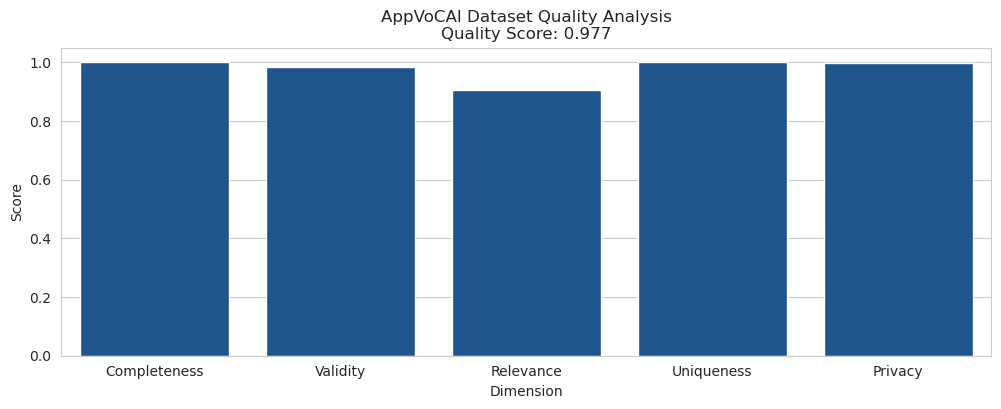

In [6]:
dqa = DQA(dataset=dataset)
dqa.analyze_quality()

While the initial data quality assessment indicates overall good quality, areas for improvement, particularly in data validity and relevance, have been identified. The next stage of data cleaning will address these areas to ensure the highest possible data quality and prepare the dataset for subsequent analysis. 

Let's break it down.

### Completeness
---
**Completeness** reflects the degree to which all data attributes (e.g. `rating`, review `content`, `vote_sum`, review `date`, etc...) are present, calculated as:

$$
\text{Completeness Score} = 1-\frac{N_n}{N}
$$

where:
- $N_n$ is the number of rows containing null values
- $N$ is the number of rows in the dataset.

This analysis shows a Completeness of 100%.

### Validity
---
**Validity** refers to the degree to which the data complies with pre-defined business rules, such as valid values, patterns, ranges, and types. Concretely, we define validity in terms of:

 - **Ratings**: Valid ratings are integers in [1,5]
 - **Category**:  The dataset categories are among the 14 valid categories included in this study.
 - **Review Date**: Review dates should be between January 1, 2020, and September of 2023. 
 - **Review Text**: Valid review text is free of:
    - control, HTML, accented, and diacritic characters, 
    - excessive special characters that comprise greater than 0.3 of all characters in a review,
    - excessive sequence, word and phrase repetition 
 
Integrating these components, we define validity score as follows:

$$\text{Validity Score} = w_r \times{\frac{N_r}{N}} + w_c \times{\frac{N_c}{N}}+ w_d \times{\frac{N_d}{N}}+ w_t \times{\frac{N_t}{N}}$$  

where:
- $N_r$ is the number of rows with valid ratings, 
- $N_c$ is the observations with valid categories, 
- $N_d$ indicates review dates in range, 
- $N_t$ is the count of rows that pass the text data quality anomaly detection checks, and
- $N$ is the number of observations in the dataset.

Weights for each of the components are:

| Dimension   | Variable | Weight | Rationale                                                                                         |
|-------------|----------|--------|---------------------------------------------------------------------------------------------------|
| Review Text | $w_t$    | 0.6    | Critical to NLP tasks; central to downstream model performance and requires complex validation. |
| Ratings     | $w_r$    | 0.2    | Ensures valid supervised labels but less impactful than text validity.                            |
| Category    | $w_c$    | 0.1    | Filters to relevant dataset categories; errors here may be less frequent or impactful.          |
| Review Date | $w_d$    | 0.1    | Ensures review dates are in expected range, but has minimal impact on NLP tasks.             |

The weights reflect the importance of review text quality in the overall validity score. 


,Component,Score
0,Rating Validity,1.00000
1,Category Validity,1.00000
2,Review Date Validity,1.00000
3,Review Validity,0.97544


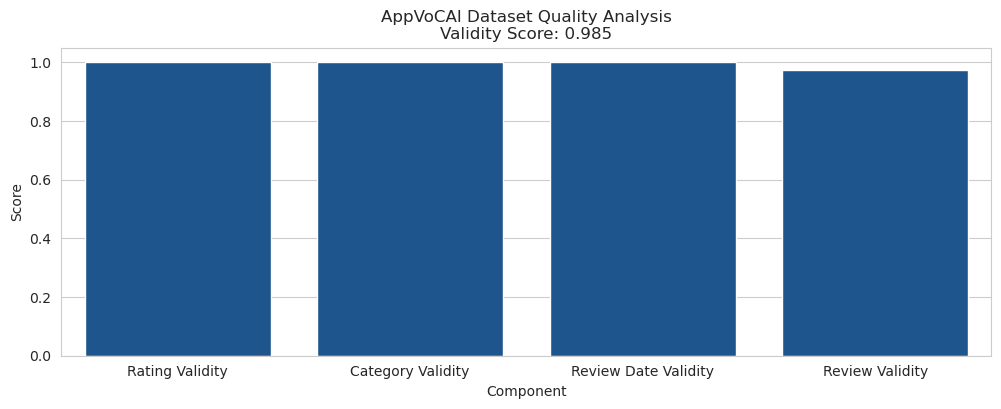

In [7]:
dqa.analyze_validity()

The **validity** scores reveal strong conformance to expected rules for **Rating**, **Category**, and **Review Date**, with all achieving perfect scores. However, **Review Validity** is significantly lower, indicating pervasive issues in the text quality of reviews. This likely reflects noise such as control characters, excessive special characters, elongation, non-ASCII content, accents, and embedded HTML. Let's take a closer look.

#### Review Validity

,Anomaly,Count,%
0,Validity Contains Excess Special Chars,137,0.023205
1,Validity Contains Elongation,4,0.000678
2,Validity Contains Irrelevant Special Chars,3,0.000508
3,Validity Contains Excess Phrase Repetition,3,0.000508


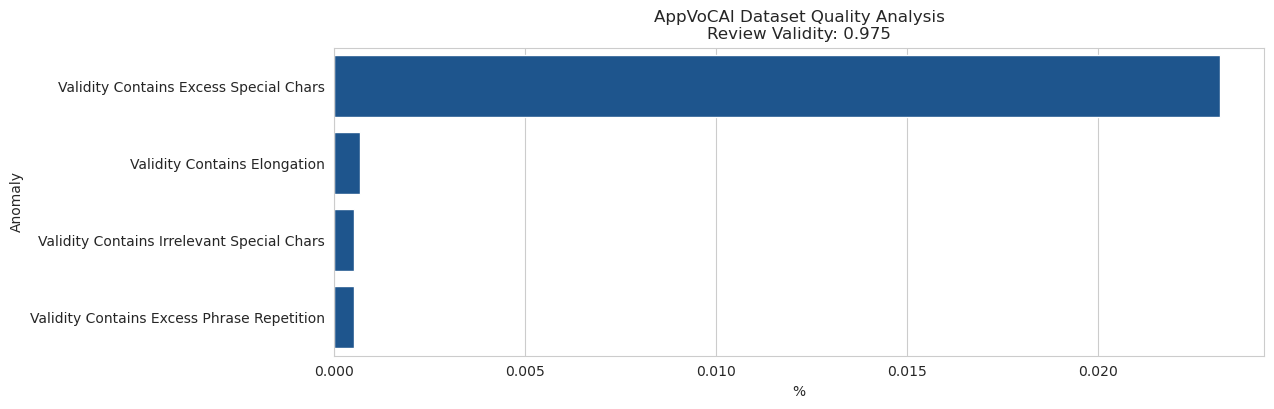

In [8]:
dqa.analyze_review_validity()

The **Review Validity** analysis highlights various forms of noise in the text, such as non-ASCII characters, excess whitespace, elongation, special characters, accents, control characters, and HTML artifacts. These issues reflect the presence of artifacts that do not carry meaningful information and can distort downstream text processing and analysis. Remediation efforts should prioritize removing or normalizing such noise to enhance the clarity and usability of the reviews while preserving the semantic integrity of the text.

### Relevance
---
**Relevance** is the degree to which specific data points or sets of data aligns with the intended purpose or business need, essentially indicating whether the data is meaningful and useful for the analysis at hand. For our analysis, we define relevance in terms of:

 - **Language**: Are the data free of non-English text in app names and reviews. 
 - **Review Length**: Aspect-based sentiment analysis requires an aspect and an opinion word. Single word reviews have questionable relevance to the task.

Our relevance score is computed as:
$$\text{Relevance Score} = w_e \times{\frac{N_e}{N}} + w_l \times{\frac{N_l}{N}}$$  

where:
- $N$ is the number of observations in the dataset,
- $N_e$ are the number of rows containing English language `app_name`s  and review `content`,
- $N_l$ are the number of reviews of length 2 or greater,

and the weights are:

| Measure       | Variable | Weight | Rationale                                                                                    |
|---------------|----------|--------|----------------------------------------------------------------------------------------------|
| Language      | $w_e$    | 0.4    | Non-English text is irrelevant and can degrade model performance.                            |
| Review Length | $w_l$    | 0.6    | ABSA requires an aspect and an opinion, so overly short reviews are inherently irrelevant. |


,Component,Score
0,Language Relevance,1.000000
1,Review Length Relevance,0.843496


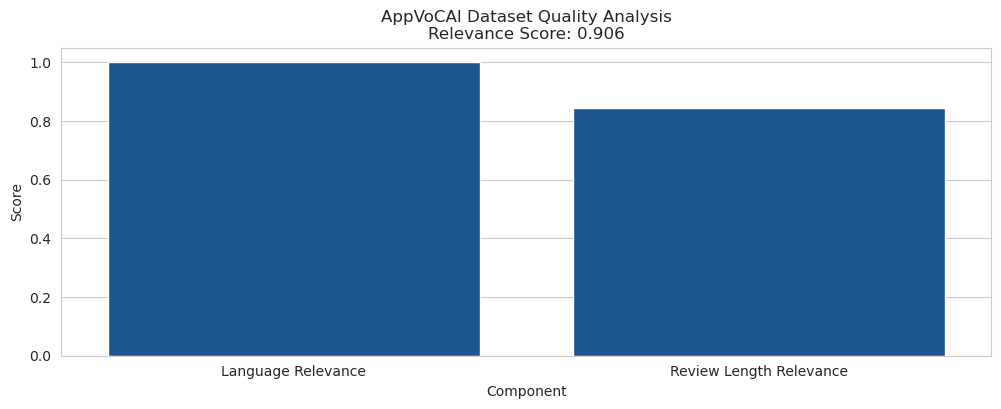

In [9]:
dqa.analyze_relevance()

The **Relevance** analysis focuses on ensuring that reviews are in English and meet a minimum length requirement. Both **Language Relevance** and **Review Length Relevance** scores are high, indicating that the majority of reviews meet these criteria. However, a small proportion of reviews fall short, potentially introducing irrelevant or low-quality data into the analysis. Addressing these issues by filtering out non-English reviews and excessively short reviews will ensure the dataset remains focused on meaningful and interpretable content.

### Uniqueness
---
We evaluate uniquness in terms of: 
- **Row Uniqueness**: The degree to which rows are unique, 
- **Review Id Uniqueness**: Indicates uniqueness of review `id`s.
- **Review Uniqueness**: The degree of uniqueness considering `app_id`, `author`, and review `content`. 

Combining these components, we compute **Uniqueness Score** as:

$$\text{Uniqueness Score} = w_u \times{\frac{N_u}{N}} + w_i \times{\frac{N_i}{N}}+ w_r \times{\frac{N_r}{N}}$$  

where:
- $N$ is the number of observations in the dataset,
- $N_u$ is the number of unique rows, 
- $N_i$ is the number of rows with unique review `id`s, 
- $N_r$ is the number of unique reviews in terms of `app_id`, `author`, and review `content`.


and the weights are defined as:

| Criterion            | Variable | Weight | Rationale                                                                                       |
|----------------------|----------|--------|-------------------------------------------------------------------------------------------------|
| Row Uniqueness       | $w_u$    | 0.3    | Ensures no exact duplicate rows, critical for data cleanliness and   avoiding redundancy.       |
| Review Id Uniqueness | $w_i$    | 0.2    | Tracks unique reviews via IDs, useful but less critical than content   uniqueness.              |
| Review Uniqueness    | $w_r$    | 0.5    | Avoids duplicate reviews based on app_id, author, and content, ensuring   quality for analysis. |


,Component,Duplicates,Score
0,Row Uniqueness,0,1.0
1,Review Id Uniqueness,0,1.0
2,Review Uniqueness,0,1.0


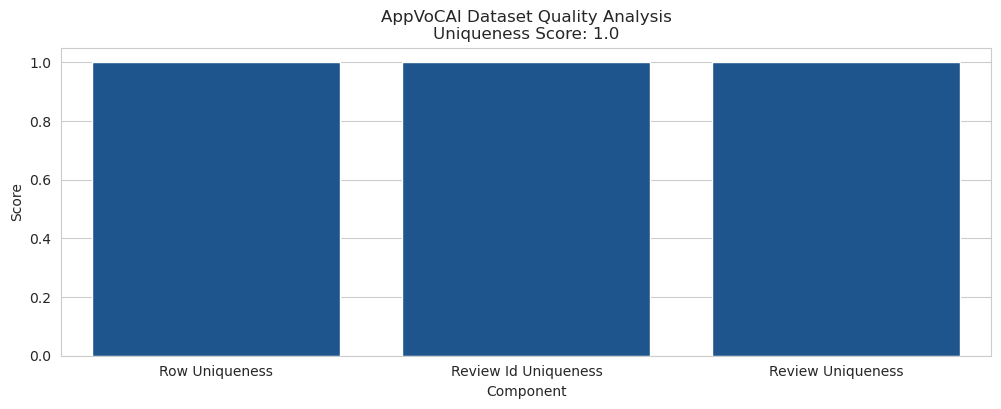

In [10]:
dqa.analyze_uniqueness()

The **Uniqueness** analysis shows strong overall performance, with perfect **Row Uniqueness** and near perfect **Review Id and Review Uniqueness**. However, **Review ID Uniqueness** is slightly below perfect, suggesting a small number of duplicate or reused identifiers. While this is a minor issue, it should be resolved to ensure accurate tracking and association of reviews with their metadata.

### Data Privacy
---
Personally Identifiable Information (PII) in datasets raises a number of ethical, privacy, and legal concerns. Here, we measure the degree to which the data are free of PII such as URLs, phone numbers, and email addresses. 
$$\text{Data Privacy}=1-\frac{N_p}{N}$$

where:
- $N_p$ are the number of observations containing PII, 
- $N$ is the number of observations in the dataset.

,Anomaly,Count,%
0,Privacy Contains Url,3,0.000508
1,Privacy Contains Email,0,0.000000
2,Privacy Contains Phone,0,0.000000


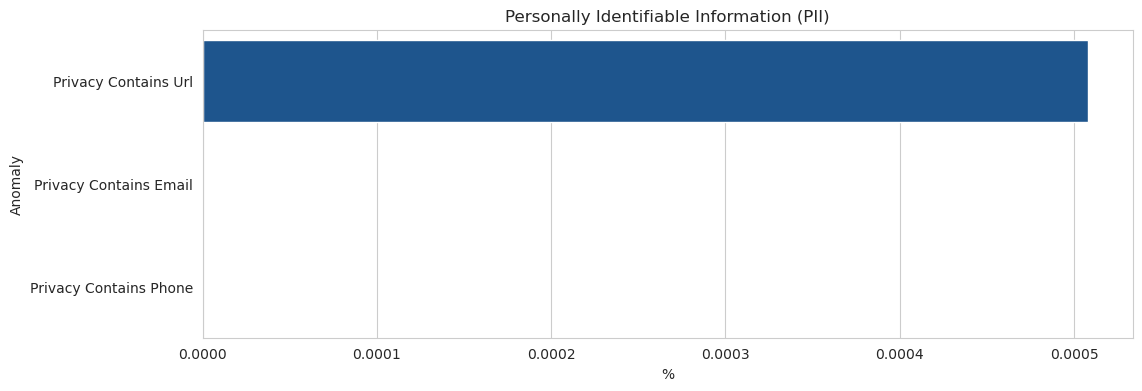

In [11]:
dqa.analyze_privacy()

The **Privacy Anomaly Detection** results highlight the presence of potentially sensitive information within the dataset:

1. **URLs**: There are ~ 426K instances (0.019%) where reviews contain URLs. This could be indicative of reviews linking to external resources or promotional content, posing a potential risk if these URLs lead to inappropriate or malicious sites. The presence of URLs requires careful handling, either through anonymization or removal, to ensure the dataset complies with privacy standards.

2. **Phone Numbers**: A total of 8,541 instances (0.0004%) contain phone numbers. Although the proportion is small, the inclusion of phone numbers is a significant privacy concern, as these could be used to identify or contact individuals. These should be redacted or anonymized to protect user privacy.

3. **Emails**: Interestingly, there are few instances (48) of emails in the dataset, indicating that users are not typically including email addresses in their reviews. While this is reflects positively, the data cleaning effort should mask or remove these email addresses from the review content.

### Implications:
- **Risk Mitigation**: Both URLs and phone numbers represent potential privacy risks and should be addressed through redaction, anonymization, or removal.
- **Compliance**: Handling these anomalies properly will help ensure the dataset adheres to privacy regulations and standards, such as GDPR.
- **Continuous Monitoring**: Although few email addresses were detected, it’s essential to maintain vigilance for any future data collection, ensuring comprehensive privacy protection.

Overall, these findings highlight areas that require remediation to safeguard user privacy while enhancing the dataset's overall integrity.

## Data Cleaning Strategy  
---  
The insights derived from the quality assessment inform the following actionable steps for the data-cleaning process:

- **Relevance**: Filter out observations with non-English app names or reviews. Ensure reviews have relevance to Aspect-Based Sentiment Analysis (ABSA) tasks by excluding non-informative reviews—those shorter than four words—that fail to convey aspect, opinion, or sentiment information.

- **Uniqueness**: Deduplicate reviews by retaining only the most recent entry per review identifier. However, retain duplicate reviews that exhibit common sentiments or linguistic expressions to preserve the authenticity of customer opinions and experiences.

- **Privacy**: Remove URLs, phone numbers, and any other personally identifiable information (PII) to comply with privacy regulations.
  
- **Validity**: Focus on reducing textual noise by removing excessive special characters, elongations, control characters, diacritics, and accents. Retain meaningful artifacts, such as emojis or domain-specific symbols, which enhance the semantic richness of the reviews.

## Conclusion  
---  
This **Data Quality Analysis** is designed for Aspect-Based Sentiment Analysis (ABSA), harnessing the capabilities of transformer models to extract contextual, relevant, and semantically rich insights from user-generated content. By employing a model-informed approach, the **Data Quality Anomaly Detection** process targeted patterns, artifacts, and noise that could compromise the dataset's integrity, validity, relevance, and privacy, while preserving key expressive elements—like emojis, emoticons, punctuation, and emphasis—that enhance the authenticity of customer feedback.

Following anomaly detection, a detailed **Data Quality Analysis** identified critical issues that could impair model performance. This analysis guided the **Data Cleaning Strategy** aimed at mitigating risks and preparing the dataset for optimal model training and accurate sentiment analysis. This bespoke, model-aware data quality framework ensures a solid foundation of high-quality data, which is essential for effective downstream modeling and inference.

Next, we will implement the outlined data cleaning strategy and perform a data quality verification to confirm that the cleaned dataset meets the necessary criteria for validity, integrity, relevance, and privacy.


In [12]:
# Stop Spark Session
container.spark.session_pool().stop()